# Synthetic Text Generation

In this notebook, we demonstrate how to synthesize free text columns, and will furthermore explore its quality.

For further background see also [this blog post](https://mostly.ai/blog/synthetic-data-for-text-annotation/) on "How To Scale Up Your Text Annotation Initiatives with Synthetic Text".

## Synthesize Data via MOSTLY AI

1. Download `london.csv` from [here](./london.csv).

2. Synthesize `london.csv` via [MOSTLY AI](https://mostly.ai/), and configure `host_name` and `title` as Encoding Type `Text` 

3. Once the job has finished, which might take up to 1 hour, download the generated synthetic data as CSV file to your computer.

4. Upload the generated synthetic data to this Notebook via executing the next cell.

In [1]:
# upload synthetic dataset
import pandas as pd
try:
    # check whether we are in Google colab
    from google.colab import files
    print("running in COLAB mode")
    repo = 'https://github.com/mostly-ai/mostly-tutorials/raw/dev/synthetic-text'
    import io
    uploaded = files.upload()
    syn = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
    print(f"uploaded synthetic data with {syn.shape[0]:,} records and {syn.shape[1]:,} attributes")
except:
    print("running in LOCAL mode")
    repo = '.'
    print("adapt `syn_file_path` to point to your generated synthetic data file")
    syn_file_path = './london-synthetic-representative.csv'
    syn = pd.read_csv(syn_file_path)
    print(f"read synthetic data with {syn.shape[0]:,} records and {syn.shape[1]:,} attributes")
    
tgt = pd.read_csv(f'{repo}/london.csv')
print(f"read original data with {tgt.shape[0]:,} records and {tgt.shape[1]:,} attributes")

running in LOCAL mode
adapt `syn_file_path` to point to your generated synthetic data file
read synthetic data with 71,938 records and 6 attributes
read original data with 71,938 records and 6 attributes


## Analyse Synthetic Text

In [2]:
# Original Data
tgt.sample(n=5, random_state=1)

,host_name,title,property_type,room_type,neighbourhood,price
65621,Pembridge,Fantastic family home - Heart of Wimbledon Vil...,Entire home,Entire home/apt,Merton,750
37282,Jovan,Luxury Apartment close to Piccadilly,Entire rental unit,Entire home/apt,Westminster,125
45547,Sue,Luxury Two Bedroom Garden Flat with own entrance,Entire rental unit,Entire home/apt,Islington,195
9442,Jane,"Bright, spacious 1 bedroom flat W6",Entire rental unit,Entire home/apt,Hammersmith and Fulham,85
66849,Haysam,Spacious double studio Flat in central London,Entire rental unit,Entire home/apt,Westminster,95


In [3]:
# Synthetic Data
syn.sample(n=5, random_state=2)

,host_name,title,property_type,room_type,neighbourhood,price
25468,Harenzo,Cosy Cairiven (Lice bed) Flat Fulham,Entire rental unit,Entire home/apt,Hammersmith and Fulham,161
11220,Roni,"✪ Special Studio 🖼 Westfields, 2 min to Underg...",Entire rental unit,Entire home/apt,Ealing,111
3198,Yvonne,Camden lantastic fainming dstead london apartment,Entire rental unit,Entire home/apt,Camden,135
38746,Mark,Top Interior Designed 1bedroom 2 bed home with...,Entire rental unit,Entire home/apt,Tower Hamlets,110
40584,George,Cosy Family Home,Entire condo,Entire home/apt,Wandsworth,173


### Inspect String Length

<Axes: ylabel='Frequency'>

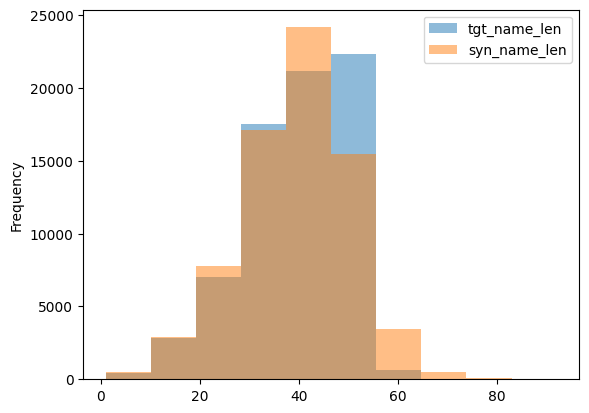

In [4]:
title_len = pd.DataFrame({
    'tgt_name_len': tgt['title'].str.len(),
    'syn_name_len': syn['title'].str.len(),
})
title_len.plot.hist(alpha=0.5)

### Inspect Character Set

In [5]:
print('## ORIGINAL ##\n', ''.join(sorted(list(set(tgt['title'].str.cat(sep=' '))))), '\n')
print('## SYNTHETIC ##\n', ''.join(sorted(list(set(syn['title'].str.cat(sep=' '))))), '\n')

## ORIGINAL ##
  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ £¦¬®°²´·ÁÉÜàáâãäåçèéìíóôöùüİıœАБВГДЛНРСУабвгдежзийклмнопрстухцшыьюяבדהוחילםמןנעפצקרשתდღ ​‍–—‘’“”•…⁂⁉⁎₂₄₆₈™↑→│▶◀●◑☀☃★☆☑☝☯☸☺☻☼♂♔♕♖♗♚♛♜♝♞♟♡♥♦♪♫♬⚜⚡✅✈✔✦✧✨✩✪✭✮✯✰✵✹✽✾✿❀❁❃❄❆❖❣❤❥❦➊➋➍➔➕➡⟮⟯⬆⭐⭑、。』【】〔〕きなのイキスバムルレ・ー一三世东两中临主之乡二五亚交亮人他付们价伦位住你佳便個倫值備僅入全公共其净出分利别剩务包区區十华单南卧卫厅厨双受可台合和品啦四回园国國在地场型堡塔墅多大天套奢女好威子字学宅安实客室宮家宽宿密寓寧専小尔层居屋市希带帶常干年床店廁建异式德心念思性惠感我或房手抢拎招排政敞敦整文斯新方日明星是晶暑暖最月有服朝期本机极林格档桥梅梯極楼欢歐比民水河治沿洁洗洲济浴海清温源溫滨独王理生用电畔留白的短碼私租立站筑精素紧絕絲级线经维罗置联肯至舍舒英華萨融西觉計設語让象豪贝质超跨車转辦迎近适通速適還邻配酒金鐵钟长間间限院陽雀露静靜非頭馨高齊간개고공교근기깔깨끔끗뉴늑는단담더던독드든락랏럭런렛룸리멋몰베보브블빛살서셔소숙실아안역욕의이인잘장존진처캠크통트파편플하한햇화️﹢！（），［］ｘ～￼𝗕𝗥𝗦𝗮𝗱𝗲𝗴𝗵𝗶𝗹𝗻𝗼𝗿𝘀𝘁𝘂𝘃𝘄𝘆𝟯🅿🇦🇧🇪🇫🇬🇮🇷🇸🇺🌃🌆🌇🌈🌞🌟🌠🌱🌲🌳🌴🌵🌸🌹🌺🌻🌿🍃🍒🎀🎬🎯🎾🏆🏒🏘🏙🏛🏟🏠🏡🏳🏴🏻🏼🐈🐱🐶👌👍👑👥💂💎💐💕💖💗💙💚💛💜💤💫📍📶🔝🖼😊😍😴🙆🚀🚂🚆🚉🚊🚌🚍🚗🚞🚨🚲🛀🛋🛌🛍🛏🤩🤴🥇🥰🧡🪴󠁢󠁥󠁧󠁮󠁿 

## SYNTHETIC ##
  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ £¦°²´·ÁÉÜàáåçèéìíóöùüİıœАВДСУавгдеийклнопртуюяיעდ​‍–—‘’“”•…⁂⁉₈↑│▶◑☀★☆☝☯☸☺☻☼♂♕♖♗♚♛♜♝♟♡♥♦♪♫♬⚡✈✔✦✧✨✩✪✮✯✰✵✹✿❀❁❃❄❆❖❣❤❦➊➍➔

### Inspect Character Frequency

In [6]:
title_char_freq = pd.merge(
    tgt['title'].str.split('').explode().value_counts(normalize=True).to_frame('tgt').reset_index(),
    syn['title'].str.split('').explode().value_counts(normalize=True).to_frame('syn').reset_index(),
    on='index', 
    how='outer'
).rename(columns={'index': 'char'}).round(5)
title_char_freq.head(10)

,char,tgt,syn
0,,0.13409,0.13375
1,o,0.07679,0.07608
2,e,0.07653,0.07714
3,n,0.05957,0.05908
4,t,0.05645,0.05664
5,a,0.05333,0.05299
6,r,0.05044,0.05041
7,,0.04836,0.04815
8,i,0.04755,0.04762
9,l,0.03462,0.03490


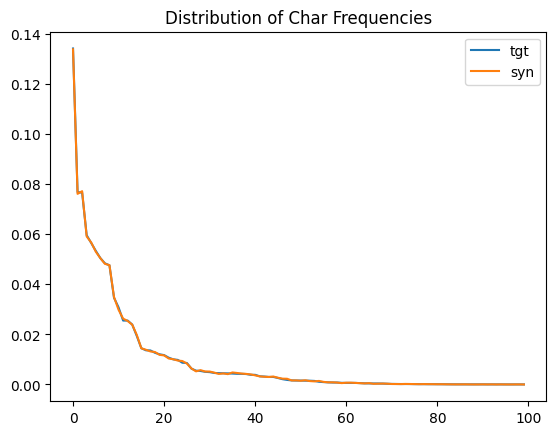

In [7]:
import matplotlib.pyplot as plt
ax = title_char_freq.head(100).plot.line()
plt.title('Distribution of Char Frequencies')
plt.show()

We can see that Character Frequencies are perfectly retained.

### Inspect Term Frequency

In [8]:
import re
def sanitize(s):
    s = str(s).lower()
    s = re.sub('[\\,\\.\\)\\(\\!\\"\\:\\/]', ' ', s)
    s = re.sub('[ ]+', ' ', s)
    return s

tgt['terms'] = tgt['title'].apply(lambda x: sanitize(x)).str.split(' ')
syn['terms'] = syn['title'].apply(lambda x: sanitize(x)).str.split(' ')
    
title_term_freq = pd.merge(
    tgt['terms'].explode().value_counts(normalize=True).to_frame('tgt').reset_index(),
    syn['terms'].explode().value_counts(normalize=True).to_frame('syn').reset_index(),
    on='index', 
    how='outer'
).rename(columns={'index': 'term'}).round(5)
display(title_term_freq.head(10))
display(title_term_freq.head(200).tail(10))

,term,tgt,syn
0,in,0.05441,0.05255
1,flat,0.03362,0.03136
2,room,0.03209,0.03420
3,london,0.02844,0.02692
4,bedroom,0.02788,0.02373
5,apartment,0.02130,0.01980
6,double,0.02063,0.02108
7,with,0.01868,0.01849
8,2,0.01759,0.01717
9,bed,0.01642,0.01753


,term,tgt,syn
190,twin,0.00070,0.00086
191,2br,0.00070,0.00084
192,unique,0.00069,0.00049
193,soho,0.00068,0.00070
194,canal,0.00068,0.00091
195,leafy,0.00067,0.00062
196,rent,0.00067,0.00076
197,cottage,0.00067,0.00073
198,excel,0.00067,0.00073
199,mews,0.00067,0.00071


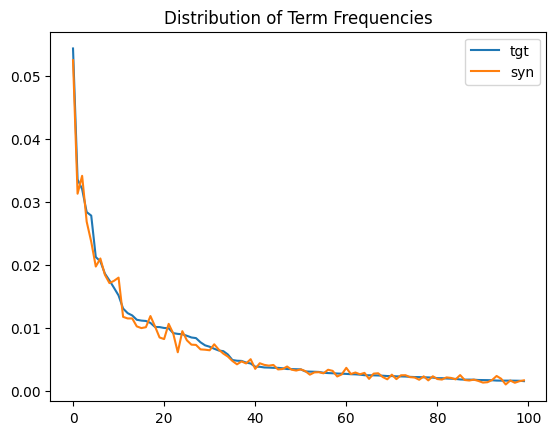

In [9]:
ax = title_term_freq.head(100).plot.line()
plt.title('Distribution of Term Frequencies')
plt.show()

We can see that Term Frequencies are perfectly retained.

### Inspect Term Co-occurrence

In [10]:
def calc_conditional_probability(term1, term2):
    tgt_beds = tgt['title'][tgt['title'].str.lower().str.contains(term1).fillna(False)]
    syn_beds = syn['title'][syn['title'].str.lower().str.contains(term1).fillna(False)]
    tgt_beds_double = tgt_beds.str.lower().str.contains(term2).mean()
    syn_beds_double = syn_beds.str.lower().str.contains(term2).mean()
    print(f"{tgt_beds_double:.0%} of actual Listings, that contain `{term1}`, also contain `{term2}`")
    print(f"{syn_beds_double:.0%} of synthetic Listings, that contain `{term1}`, also contain `{term2}`")
    print("")

calc_conditional_probability('bed', 'double')
calc_conditional_probability('bed', 'king')
calc_conditional_probability('heart', 'london')
calc_conditional_probability('london', 'heart')

14% of actual Listings, that contain `bed`, also contain `double`
13% of synthetic Listings, that contain `bed`, also contain `double`

7% of actual Listings, that contain `bed`, also contain `king`
6% of synthetic Listings, that contain `bed`, also contain `king`

28% of actual Listings, that contain `heart`, also contain `london`
26% of synthetic Listings, that contain `heart`, also contain `london`

4% of actual Listings, that contain `london`, also contain `heart`
4% of synthetic Listings, that contain `london`, also contain `heart`



We can see that Term Co-occurrences are perfectly retained.

### Inspect Exact Matches

In [11]:
# check exact matches within original - for that we split original 50/50 into two parts
n = int(tgt.shape[0]/2)
pd.merge(tgt[['title']][:n].drop_duplicates(), tgt[['title']][n:].drop_duplicates())

,title
0,Cozy double room
1,Single room
2,Double room
3,Bright double room
4,Double Room in Victorian Terrace
...,...
318,"Euston Square Hotel, Superior Double Room (2DX)"
319,"Furnished Flat in Central London, Edgware Road..."
320,Double room to rent
321,"Prime area, professional cleaning, high speed ..."


In [12]:
# check exact matches between original and synthetic - again using 50% of data
pd.merge(tgt[['title']][:n].drop_duplicates(), syn[['title']][:n].drop_duplicates())

,title
0,Cozy double room
1,Spacious Double Room in East London
2,Single room
3,Double room
4,Bright double room
...,...
231,Home away from Home
232,Bright and cosy room
233,Rent
234,Lovely single room


We can see that exact matches between original and synthetic data can occur. However, they occur only for the most commonly used descriptions, and they do not occur more often than what they occur for the original data itself.

### Analyze Price vs. Text correlation

In [13]:
tgt_term_price = tgt[['terms', 'price']].explode(column='terms').groupby('terms')['price'].median()
syn_term_price = syn[['terms', 'price']].explode(column='terms').groupby('terms')['price'].median()
def print_term_price(term):
    print(f"Median Price of actual Listings, that contain `{term}`: ${tgt_term_price[term]:.0f}")
    print(f"Median Price of synthetic Listings, that contain `{term}`: ${syn_term_price[term]:.0f}")
    print("")

print_term_price("luxury")
print_term_price("stylish")
print_term_price("cozy")
print_term_price("small")

Median Price of actual Listings, that contain `luxury`: $180
Median Price of synthetic Listings, that contain `luxury`: $179

Median Price of actual Listings, that contain `stylish`: $134
Median Price of synthetic Listings, that contain `stylish`: $140

Median Price of actual Listings, that contain `cozy`: $70
Median Price of synthetic Listings, that contain `cozy`: $70

Median Price of actual Listings, that contain `small`: $55
Median Price of synthetic Listings, that contain `small`: $60



We can see that correlations between Term occurence and the price per night, are also perfectly retained.

## Conclusion

This tutorial demonstrated how synthetic text can be generated wihtin the context of an otherwise structured dataset. We analyzed the generated texts, and validated that characters and terms occur with the same frequency, while exact matches do not occur anymore likely than within the actual text itself.

This feature thus allows to retain valuable statistical insights, typically burried away in free text columns, that remain inaccessible due to their privacy sensitive nature.

## Further exercises

In addition to walking through the above instructions, we suggest..
* analyzing further correlations, also for `host_name`
* using a different generation mood, eg. conservative sampling
* using a different dataset, eg. the Austrian First Name [[1](#refs)]

## References<a class="anchor" name="refs"></a>

1. https://github.com/mostly-ai/public-demo-data/blob/dev/firstnames_at/firstnames_at.csv.gz